In [1]:
import pandas as pd
import numpy as np
import multipledispatch as md
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('climate_action_data.csv')

print(df.head())
print(df.info())
print(df.describe())

  Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0  SEN-1000  2025-01-01            36.22    6.98           21.3        50.4   
1  SEN-1001  2025-01-02            76.55    5.03           23.5        34.3   
2  SEN-1002  2025-01-03            61.24    6.52           21.9        54.6   
3  SEN-1003  2025-01-04            51.91    6.62           24.0        48.7   
4  SEN-1004  2025-01-05            20.92    5.98           19.2        70.6   

  Crop_Type Fertilizer_Recommended(kg/ha) Irrigation_Recommended(mm)  \
0  Tomatoes                          67.6                       26.6   
1     Wheat                         130.4                        8.3   
2  Tomatoes                          36.0                       29.4   
3     Maize                          85.8                       19.6   
4     Wheat                          75.6                       29.9   

  Drone_Image_ID  
0       IMG-2000  
1       IMG-2001  
2       IMG-2002  
3       IMG-2003

In [2]:
df.shape

(913, 10)

In [4]:
df.head()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [7]:
print("Initail missing values:\n",df.isnull().sum())

Initail missing values:
 Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [8]:
df.replace('error', np.nan, inplace=True)

In [ ]:
numeric_cols = [
    'Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 
    'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)'
]
# converting numeric columns
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [11]:
# handling with median
for col in numeric_cols:
    df[col] = df.groupby('Crop_Type')[col].transform(
        lambda x: x.fillna(x.median())
    )

In [12]:
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, coercing errors
        # Fill missing values with the median   
        df[col] = df[col].fillna(df[col].median())  # Fill missing values with the median

In [13]:
# for categorical columns,  filling missing values with the mode
categorical_cols = ['Signal']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])  # Fill missing values with the mode

In [14]:
print("Missing values after handling:")
print(df.isnull().sum())  # Check for missing values after handling        
        

Missing values after handling:
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert to datetime

In [ ]:
# checking for duplicates rows
duplicates = df[df.duplicated()]
print(duplicates)


    Sensor_ID       Date  Soil_Moisture(%)  Soil_pH  Temperature(C)  \
800  SEN-1008 2025-01-09             52.08     6.08            22.0   
802  SEN-1175 2025-06-25             22.21     5.42            23.4   
803  SEN-1735 2027-01-06             71.40     4.93            24.5   
804  SEN-1242 2025-08-31             74.04     5.62            25.5   
805  SEN-1764 2027-02-04             12.35     7.38            27.8   
..        ...        ...               ...      ...             ...   
908  SEN-1090 2025-04-01             18.37     7.03            21.0   
909  SEN-1201 2025-07-21             15.89     6.40            30.5   
910  SEN-1309 2025-11-06             28.96     5.04            20.5   
911  SEN-1339 2025-12-06             16.85     6.57            19.3   
912  SEN-1050 2025-02-20             77.87     4.73            18.6   

     Humidity(%) Crop_Type  Fertilizer_Recommended(kg/ha)  \
800         89.3  Tomatoes                           67.8   
802         68.4     Bean

In [24]:
# Check for duplicate rows
print(f"Number of duplicates: {df.duplicated().sum()}")

# Remove duplicates
df = df.drop_duplicates()

# Check for duplicate dates (should be unique)
print(f"Duplicate dates: {df['Date'].duplicated().sum()}")
df = df.drop_duplicates(subset=['Date'], keep='first')

Number of duplicates: 111
Duplicate dates: 3


In [26]:
print(f"Number of duplicates after dropping: {df.duplicated().sum()}")

Number of duplicates after dropping: 0


In [25]:
print(df.info())

print("Missing values after all cleaning:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sensor_ID                      799 non-null    object        
 1   Date                           798 non-null    datetime64[ns]
 2   Soil_Moisture(%)               799 non-null    float64       
 3   Soil_pH                        799 non-null    float64       
 4   Temperature(C)                 799 non-null    float64       
 5   Humidity(%)                    799 non-null    float64       
 6   Crop_Type                      795 non-null    object        
 7   Fertilizer_Recommended(kg/ha)  799 non-null    float64       
 8   Irrigation_Recommended(mm)     799 non-null    float64       
 9   Drone_Image_ID                 799 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 68.7+ KB
None
Missing values afte

In [27]:
df.shape

(799, 10)

In [28]:
# Replace 'error' entries with NaN
df = df.replace('error', np.nan)

In [29]:
# After type conversion
print("\nData types after conversion:")
print(df.dtypes)


Data types after conversion:
Sensor_ID                                object
Date                             datetime64[ns]
Soil_Moisture(%)                        float64
Soil_pH                                 float64
Temperature(C)                          float64
Humidity(%)                             float64
Crop_Type                                object
Fertilizer_Recommended(kg/ha)           float64
Irrigation_Recommended(mm)              float64
Drone_Image_ID                           object
dtype: object


In [30]:
#  Convert numeric columns (safer approach)
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Handle missing values (updated methods)
# Option 1: Using direct assignment (recommended)
df['Soil_Moisture(%)'] = df['Soil_Moisture(%)'].ffill()
df['Soil_pH'] = df['Soil_pH'].ffill()

# Option 2: Using fillna with dictionary (alternative)
df = df.fillna({
    'Temperature(C)': df['Temperature(C)'].mean(),
    'Humidity(%)': df['Humidity(%)'].mean(),
    'Crop_Type': df['Crop_Type'].mode()[0] if 'Crop_Type' in df else None
})

# Alternative for crop type if needed
if 'Crop_Type' in df.columns:
    df.loc[:, 'Crop_Type'] = df['Crop_Type'].fillna(df['Crop_Type'].mode()[0])
    
    # After handling missing values
print("\nMissing values after cleaning:")
print(df.isna().sum())

# Final cleaned data preview
print("\nFinal cleaned data sample:")
print(df.sample(5))


Missing values after cleaning:
Sensor_ID                        0
Date                             1
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

Final cleaned data sample:
    Sensor_ID       Date  Soil_Moisture(%)  Soil_pH  Temperature(C)  \
20   SEN-1020 2025-01-21             52.83     7.31            25.9   
668  SEN-1668 2026-10-31             23.06     7.55            22.0   
749  SEN-1749 2027-01-20             53.70     6.72            18.2   
142  SEN-1142 2025-05-23             44.81     6.78            31.1   
268  SEN-1268 2025-09-26             35.16     5.74            20.2   

     Humidity(%) Crop_Type  Fertilizer_Recommended(kg/ha)  \
20          39.6   Lettuce                           90.1   
668         45.1     Maize  

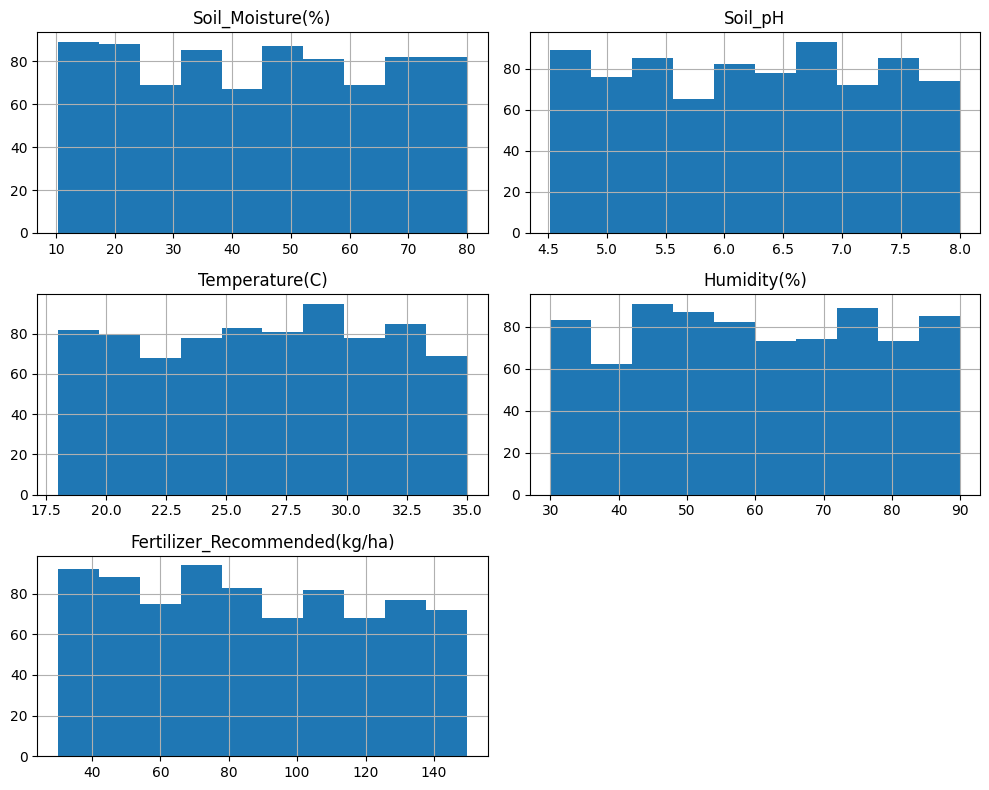

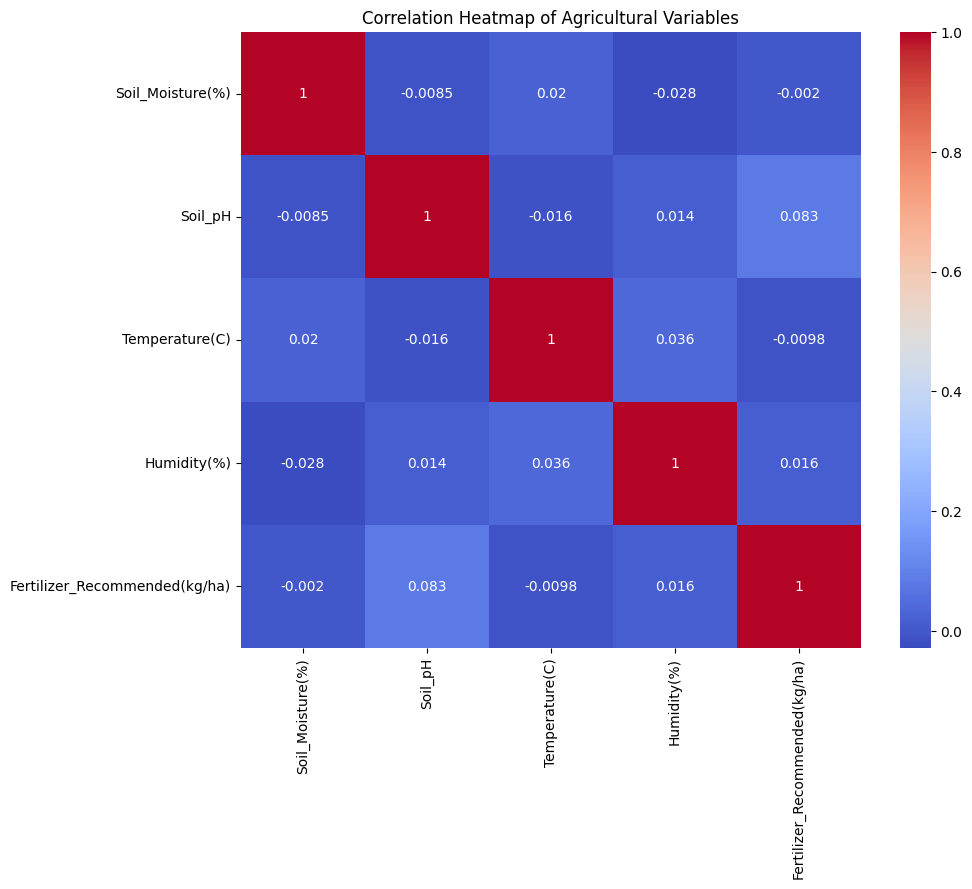

In [31]:
# Use the correct column names for numeric variables
df[numeric_cols].hist(figsize=(10,8))
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Agricultural Variables')
plt.show()

In [ ]:
# /

In [36]:
# Convert 'Temperature(C)' to numeric (handling errors if any)
df['Temperature(C)'] = pd.to_numeric(df['Temperature(C)'], errors='coerce')

# Drop rows with missing 'Temperature(C)' or 'Crop_Type'
df.dropna(subset=['Temperature(C)', 'Crop_Type'], inplace=True)

In [37]:
avg_temp_by_crop = df.groupby('Crop_Type')['Temperature(C)'].mean().reset_index()

In [38]:
# Sort by temperature in descending order
avg_temp_by_crop_sorted = avg_temp_by_crop.sort_values('Temperature(C)', ascending=False)

# Get the crop with the highest average temperature
highest_temp_crop = avg_temp_by_crop_sorted.iloc[0]
print(f"Crop with highest average temperature: {highest_temp_crop['Crop_Type']} ({highest_temp_crop['Temperature(C)']:.2f}°C)")

Crop with highest average temperature: Maize (27.01°C)


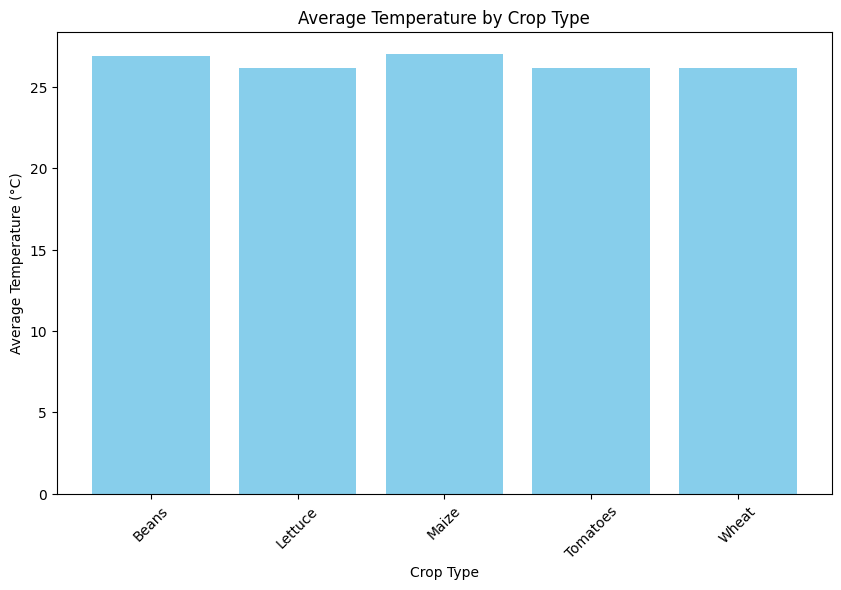

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(avg_temp_by_crop['Crop_Type'], avg_temp_by_crop['Temperature(C)'], color='skyblue')
plt.xlabel('Crop Type')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature by Crop Type')
plt.xticks(rotation=45)
plt.show()

In [32]:
# Variables influencing fertilizer recommendations
correlations = df[numeric_cols].corr()['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)
print("Factors most influencing fertilizer recommendations:")
print(correlations)

# Crop with highest average soil moisture
if 'Crop_Type' in df.columns:
    crop_moisture = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)
    highest_moisture_crop = crop_moisture.idxmax()
    print(f"\nCrop with highest average soil moisture: {highest_moisture_crop}")

# Irrigation adjustments for high-temperature crops
high_temp_crops = df[df['Temperature(C)'] > 30]
if not high_temp_crops.empty and 'Crop_Type' in df.columns:
    print("\nSuggested irrigation adjustments for crops >30°C:")
    # Suggest increased irrigation for these crops
    for crop in high_temp_crops['Crop_Type'].unique():
        print(f"- {crop}: Increase irrigation frequency by 20% and monitor soil moisture daily")

Factors most influencing fertilizer recommendations:
Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.082525
Humidity(%)                      0.015693
Soil_Moisture(%)                -0.001989
Temperature(C)                  -0.009847
Name: Fertilizer_Recommended(kg/ha), dtype: float64

Crop with highest average soil moisture: Wheat

Suggested irrigation adjustments for crops >30°C:
- Lettuce: Increase irrigation frequency by 20% and monitor soil moisture daily
- Maize: Increase irrigation frequency by 20% and monitor soil moisture daily
- Wheat: Increase irrigation frequency by 20% and monitor soil moisture daily
- Tomatoes: Increase irrigation frequency by 20% and monitor soil moisture daily
- Beans: Increase irrigation frequency by 20% and monitor soil moisture daily


In [33]:
def clean_agriculture_data(filepath):
    # Load data
    df = pd.read_csv(filepath)
    print(f"Data loaded successfully | Initial shape: {df.shape}")
    
    # Initial cleaning
    initial_rows = len(df)
    df = df.drop_duplicates()
    print(f" Removed {initial_rows - len(df)} duplicates | New shape: {df.shape}")
    
    # Replace errors and convert types
    df = df.replace('error', np.nan)
    numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 
                   'Humidity(%)', 'Fertilizer_Recommended(kg/ha)']
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
    print("Converted numeric columns:", numeric_cols)
    
    # Handle missing values
    print("\n Missing values before cleaning:")
    print(df.isna().sum())
    
    df['Soil_Moisture(%)'] = df['Soil_Moisture(%)'].ffill()
    df['Soil_pH'] = df['Soil_pH'].ffill()
    
    df = df.fillna({
        'Temperature(C)': df['Temperature(C)'].mean(),
        'Humidity(%)': df['Humidity(%)'].mean(),
        'Crop_Type': df['Crop_Type'].mode()[0] if 'Crop_Type' in df else None
    })
    
    print("\n Missing values after cleaning:")
    print(df.isna().sum())
    
    return df

# Usage
cleaned_df = clean_agriculture_data('climate_action_data.csv')
print("\n Final cleaned data:")
print("cleaned")

Data loaded successfully | Initial shape: (913, 10)
 Removed 111 duplicates | New shape: (802, 10)
Converted numeric columns: ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)']

 Missing values before cleaning:
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 5
Soil_pH                          5
Temperature(C)                   5
Humidity(%)                      5
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    5
Irrigation_Recommended(mm)       5
Drone_Image_ID                   0
dtype: int64

 Missing values after cleaning:
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    5
Irrigation_Recommended(mm)       5
Drone_Image_ID                 

In [35]:
# Export cleaned data
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)

# Document insights
insights = """
Key Insights:
1. Fertilizer recommendations are most strongly influenced by: {top_3_factors}
2. {highest_moisture_crop} crops require the most soil moisture on average
3. For crops experiencing temperatures above 30°C, recommended actions:
   - Increase irrigation frequency
   - Monitor soil moisture more frequently
   - Consider shade solutions for heat-sensitive crops

Recommendations:
- Implement dynamic fertilizer adjustments based on {primary_factor}
- Group irrigation schedules by crop type and temperature ranges
- Install additional sensors in {highest_moisture_crop} fields for better monitoring
""".format(
    top_3_factors=', '.join(correlations.index[:3]),
    highest_moisture_crop=highest_moisture_crop,
    primary_factor=correlations.index[0]
)

with open('agriculture_analysis_insights.txt', 'w') as f:
    f.write(insights)
    
    print("exported successfully")

exported successfully
